<a href="https://colab.research.google.com/github/KingNghi/KingNghi/blob/main/Telco_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
df_pred = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/telco_churn_to_predict.csv')
df_demo = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Telco_customer_churn_demographics.xlsx')
df_service = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Telco_customer_churn_services.xlsx')
df_status = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Telco_customer_churn_status.xlsx')

## Cleaning

In [4]:
# Merge all the three files into one
df = df_demo.merge(df_service, on="Customer ID").merge(df_status, on="Customer ID")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count_x                            7043 non-null   int64  
 2   Gender                             7043 non-null   object 
 3   Age                                7043 non-null   int64  
 4   Under 30                           7043 non-null   object 
 5   Senior Citizen                     7043 non-null   object 
 6   Married                            7043 non-null   object 
 7   Dependents                         7043 non-null   object 
 8   Number of Dependents               7043 non-null   int64  
 9   Count_y                            7043 non-null   int64  
 10  Quarter_x                          7043 non-null   object 
 11  Referred a Friend                  7043 non-null   objec

In [6]:
# Check for missing values
print(df.isnull().sum())

Customer ID                             0
Count_x                                 0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Count_y                                 0
Quarter_x                               0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan            

In [21]:
# Check for duplicated values
print(df.duplicated().sum())

0


##Exploratory Data Analysis (EDA)

In [22]:
df.describe()

,Count_x,Age,Dependents,Number of Dependents,Count_y,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Count,Satisfaction Score,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,0.0,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,46.509726,NaN,0.468692,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,1.0,3.244924,0.265370,58.505040,4400.295755
std,0.0,16.750352,NaN,0.962802,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,0.0,1.201657,0.441561,21.170031,1183.057152
min,1.0,19.000000,NaN,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.0,1.000000,0.000000,5.000000,2003.000000
25%,1.0,32.000000,NaN,0.000000,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,1.0,3.000000,0.000000,40.000000,3469.000000
50%,1.0,46.000000,NaN,0.000000,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,1.0,3.000000,0.000000,61.000000,4527.000000
75%,1.0,60.000000,NaN,0.000000,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,1.0,4.000000,1.000000,75.500000,5380.500000
max,1.0,80.000000,NaN,9.000000,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,1.0,5.000000,1.000000,96.000000,6500.000000


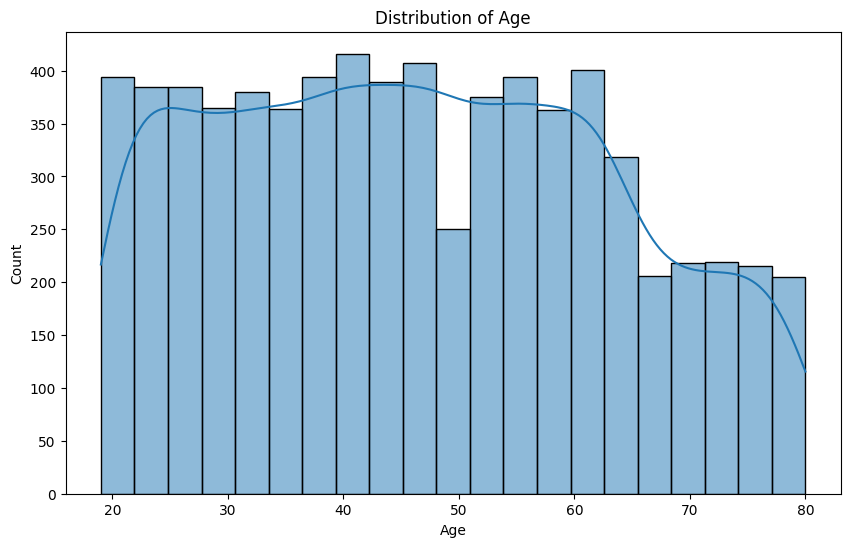

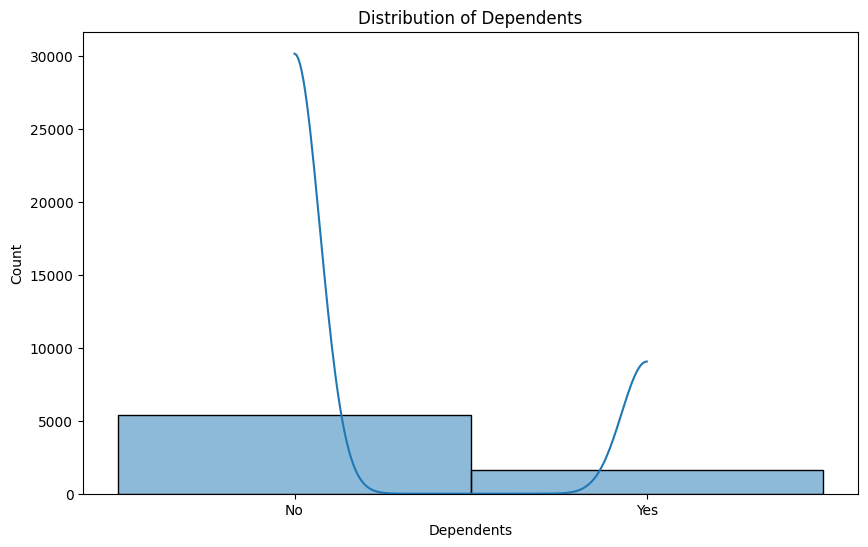

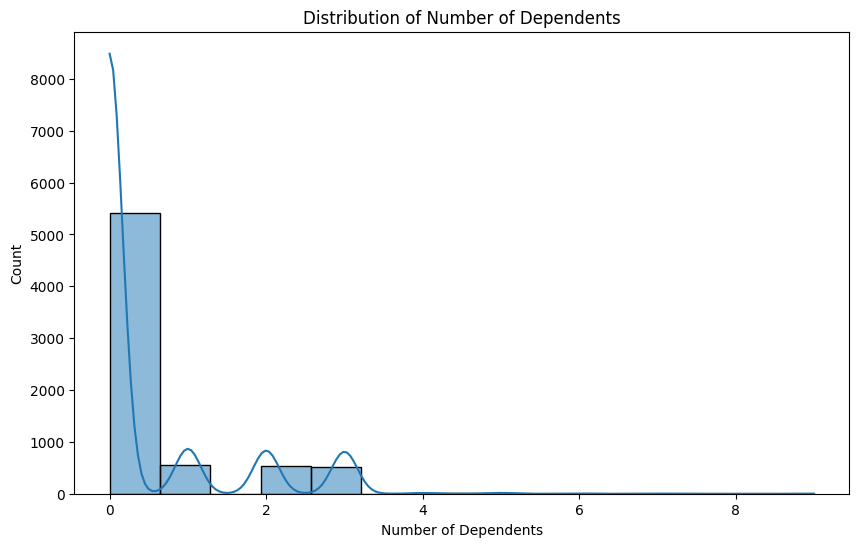

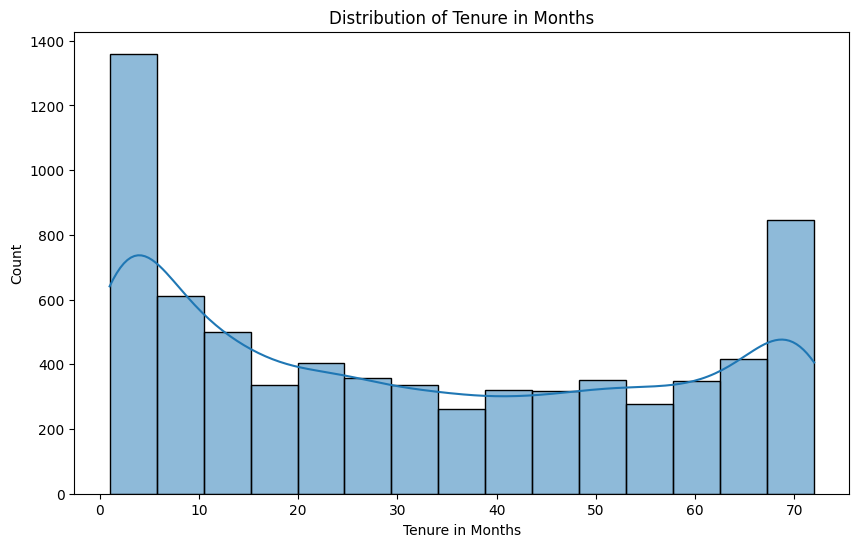

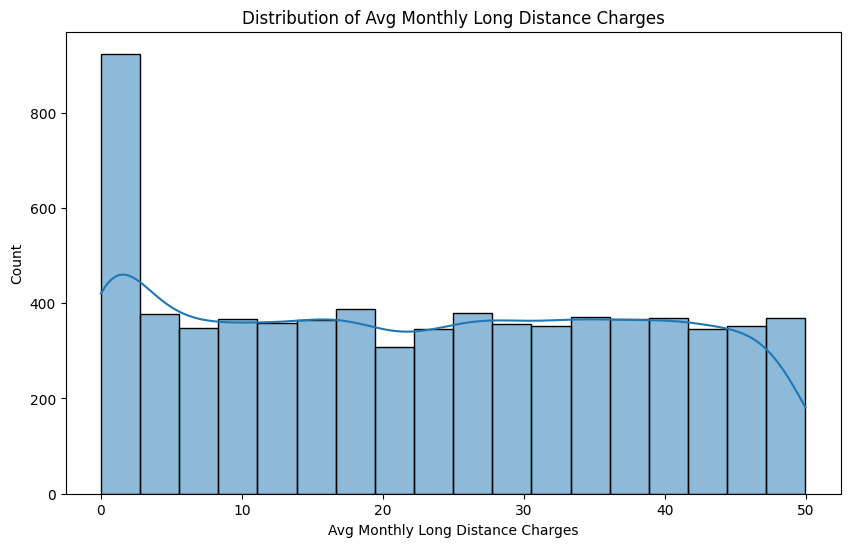

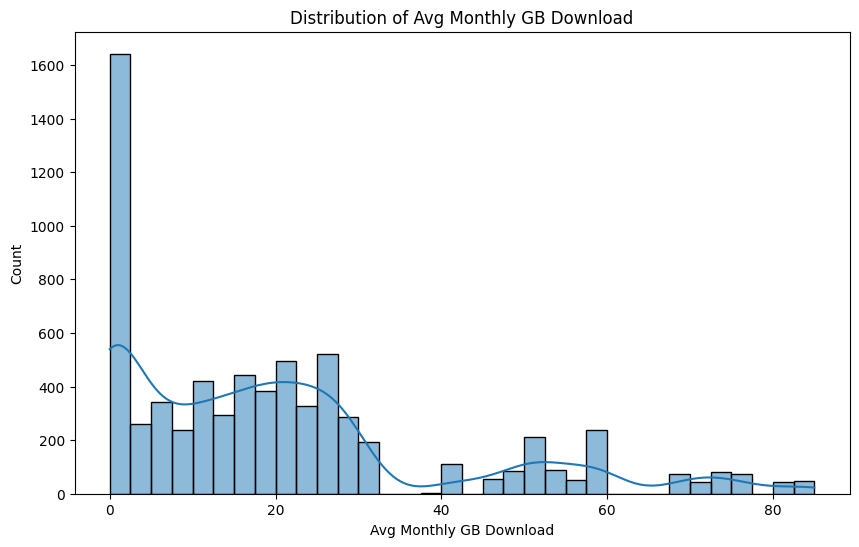

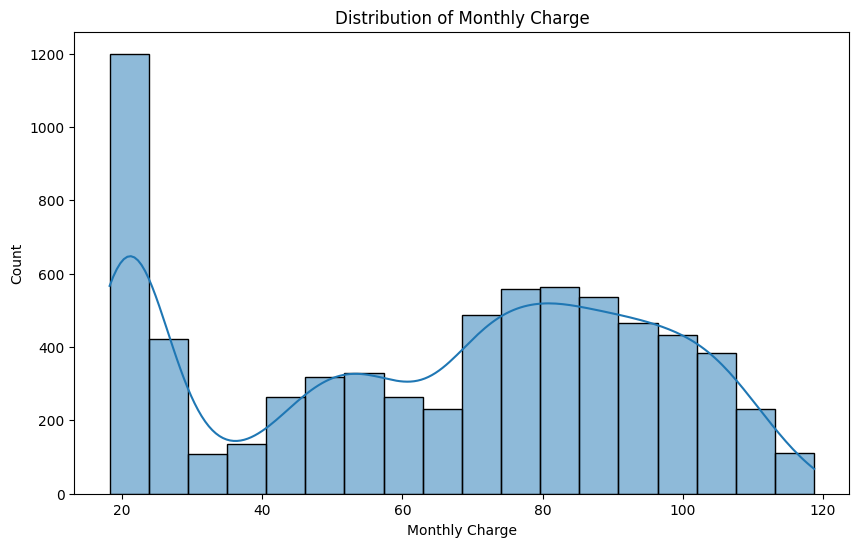

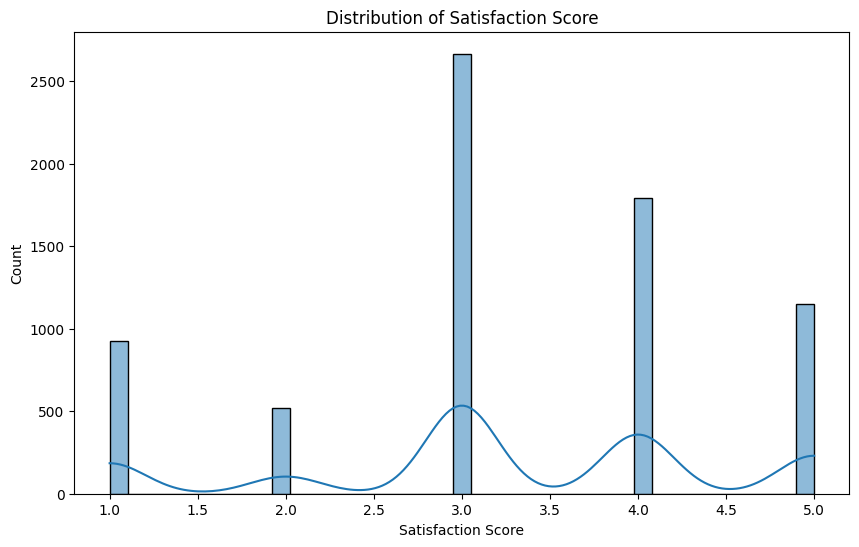

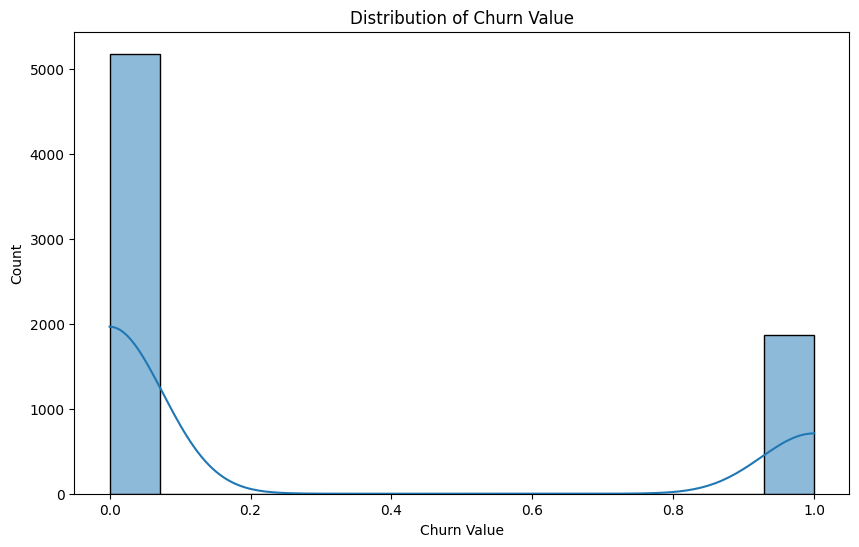

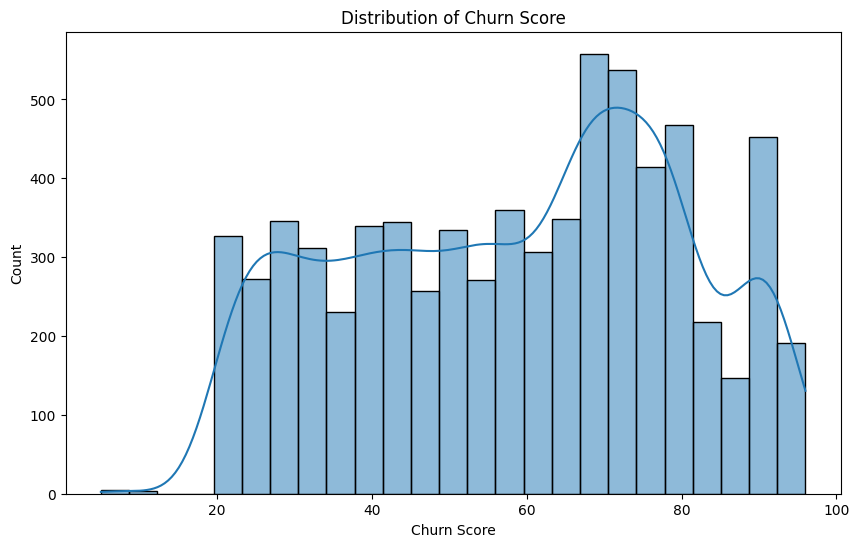

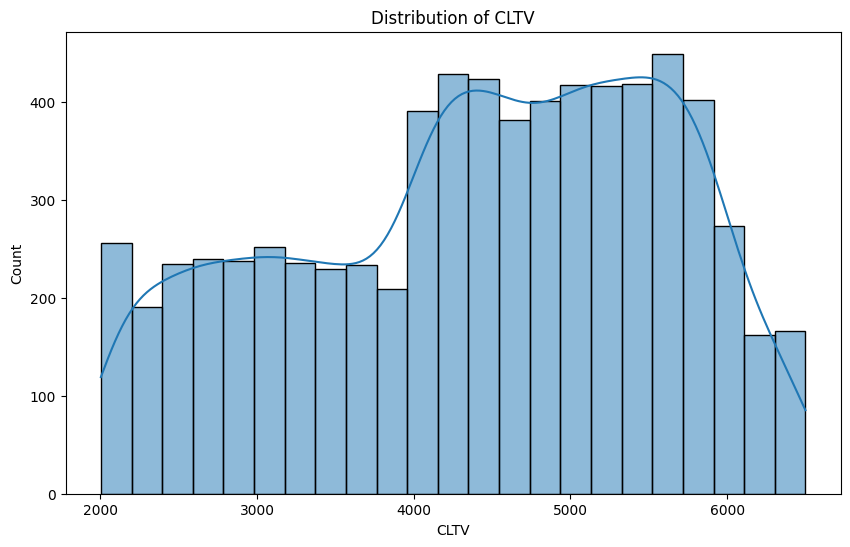

In [9]:
# Create 2 specific lists of numerical and categorical types for better illustration
numerical_columns = [
    'Age',
    'Dependents',
    'Number of Dependents',
    'Tenure in Months',
    'Avg Monthly Long Distance Charges',
    'Avg Monthly GB Download',
    'Monthly Charge',
    'Satisfaction Score',
    'Churn Value',
    'Churn Score',
    'CLTV'
]

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)  # Histogram with KDE
    plt.title(f'Distribution of {column}')
    plt.show()


Contract Type and Churn:

- Month-to-Month contracts have a higher churn rate compared to One Year and Two Year contracts.

- Longer-term contracts show better customer retention.

Distribution of Dependents:

- The majority of customers do not have dependents.

- A significantly lower count of customers have dependents.

Monthly Long-Distance Charges:

- Most customers have low average monthly long-distance charges (0-5 range).

- There is a consistent but lower distribution of customers with higher long-distance charges.

Satisfaction Score Distribution:

- The most common satisfaction score is 3.0 (neutral).

- Additional peaks at scores 1.0, 2.0, 4.0, and 5.0 indicate varied satisfaction levels.

Churn Score Distribution:

- Notable peaks around churn scores of 20, 60, and 80.

Customer Lifetime Value (CLTV) Distribution:

- The highest frequency of CLTV values is in the range of 4000-5000.

- Fewer customers have very high CLTV beyond 5000.

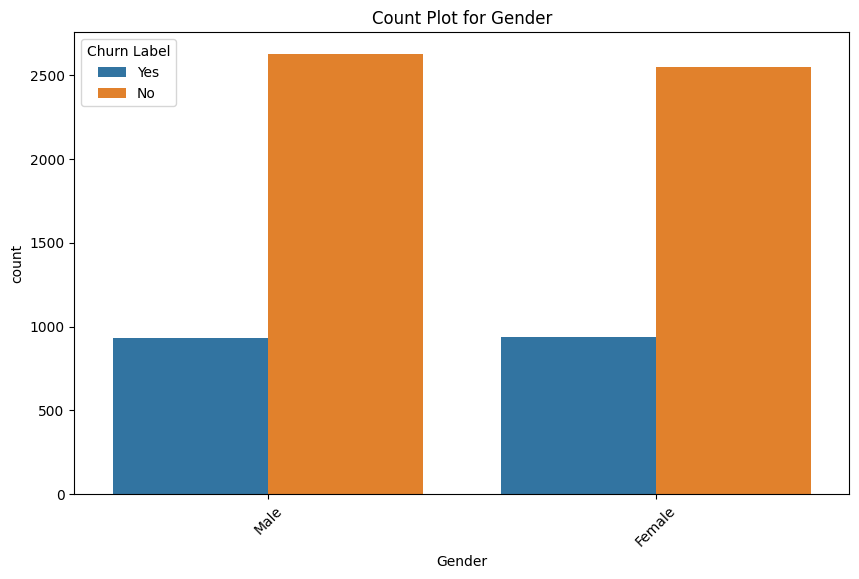

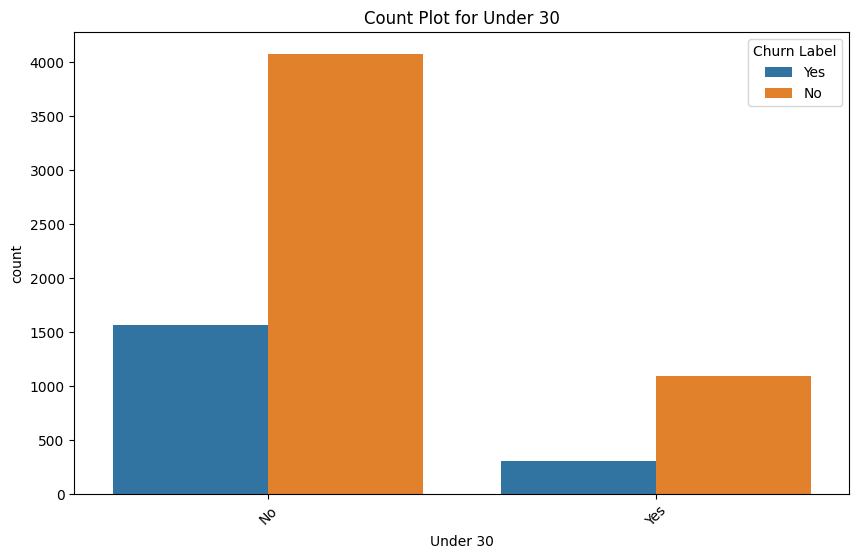

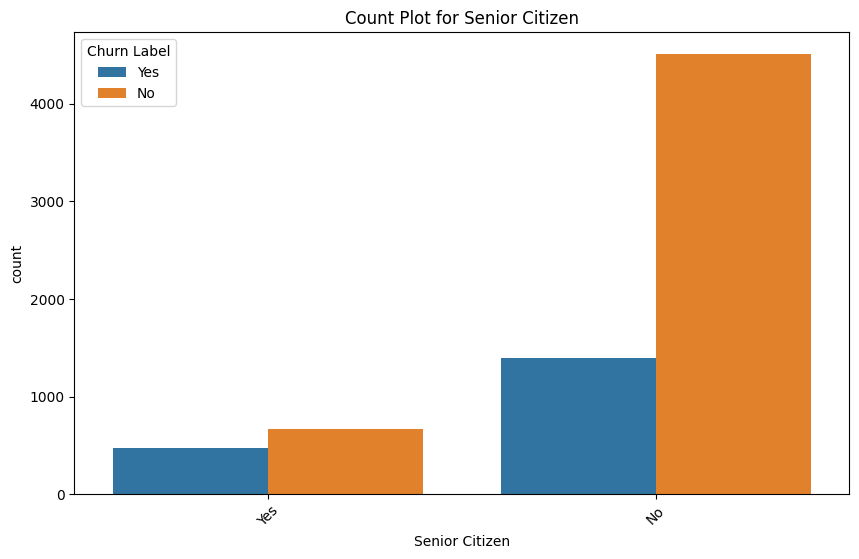

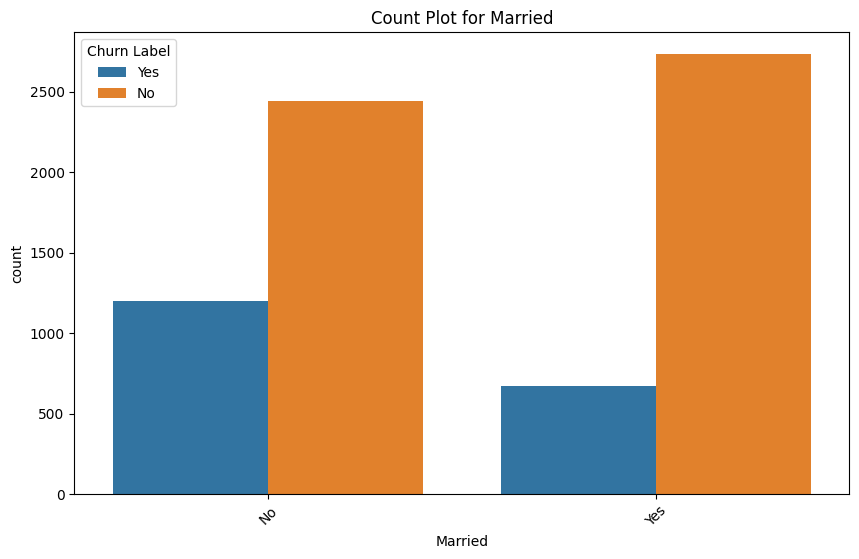

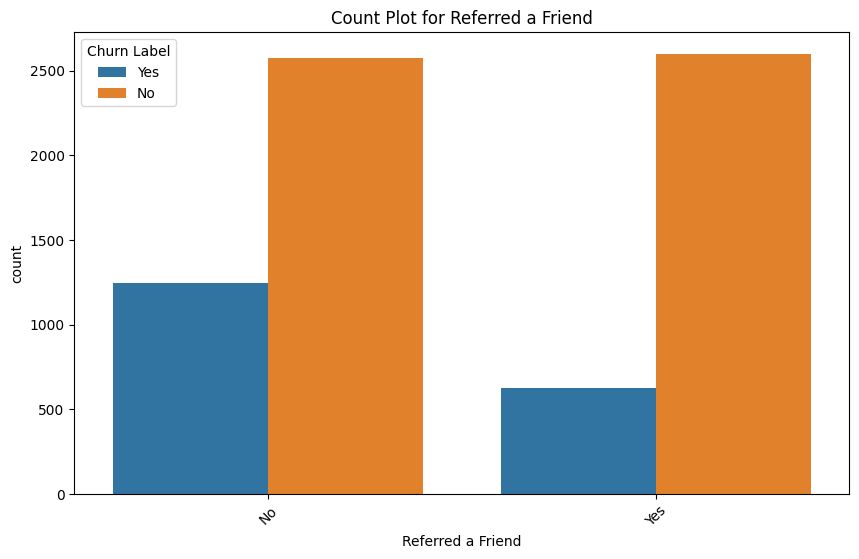

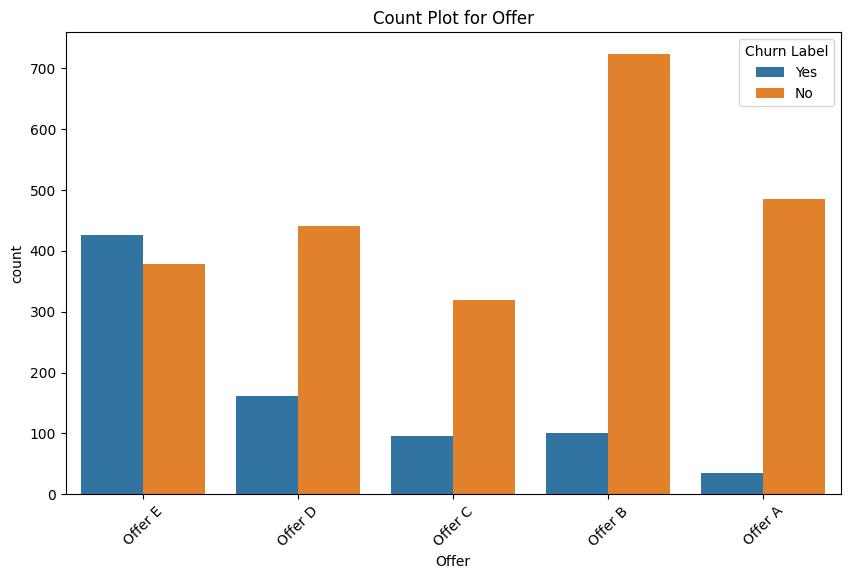

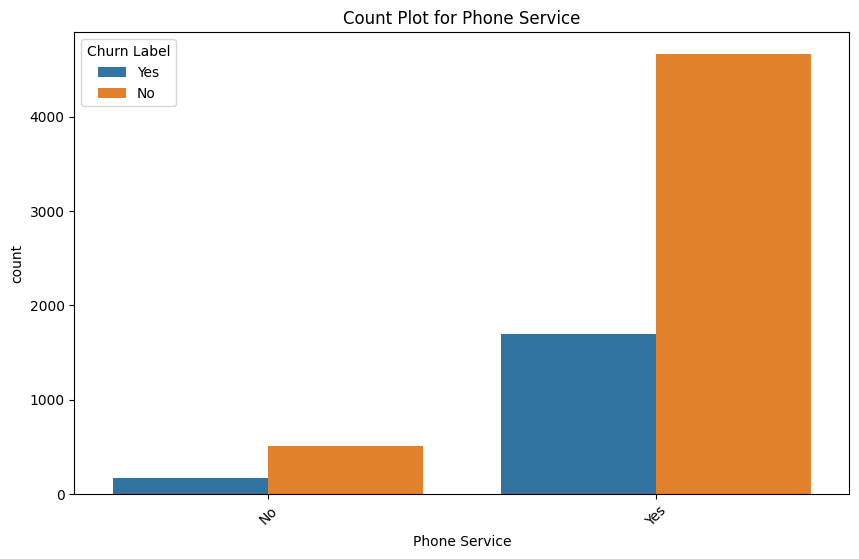

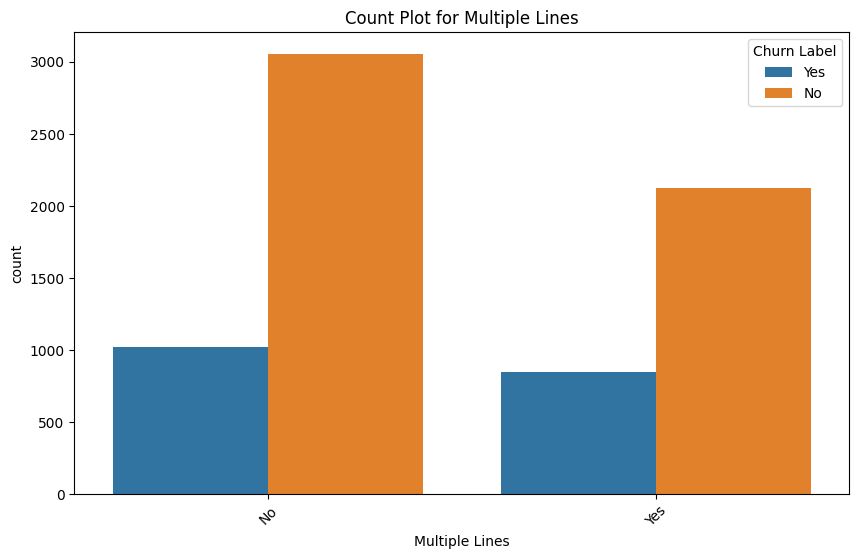

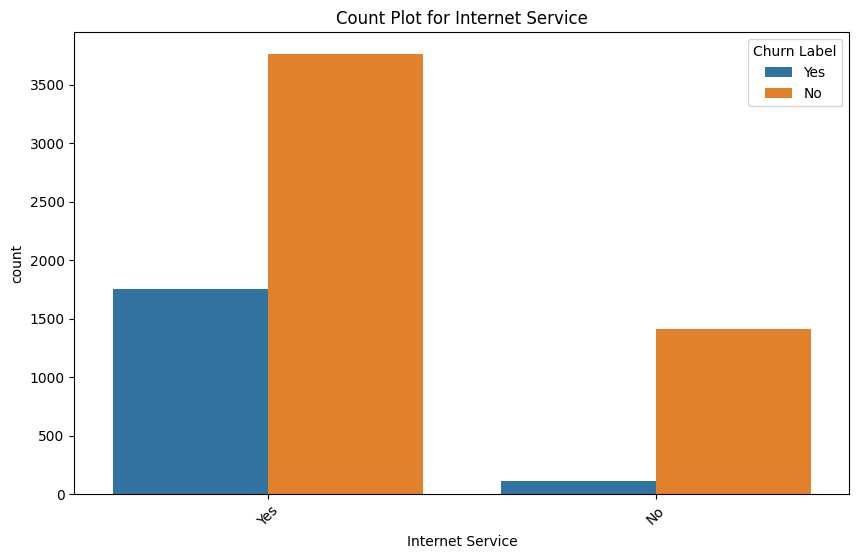

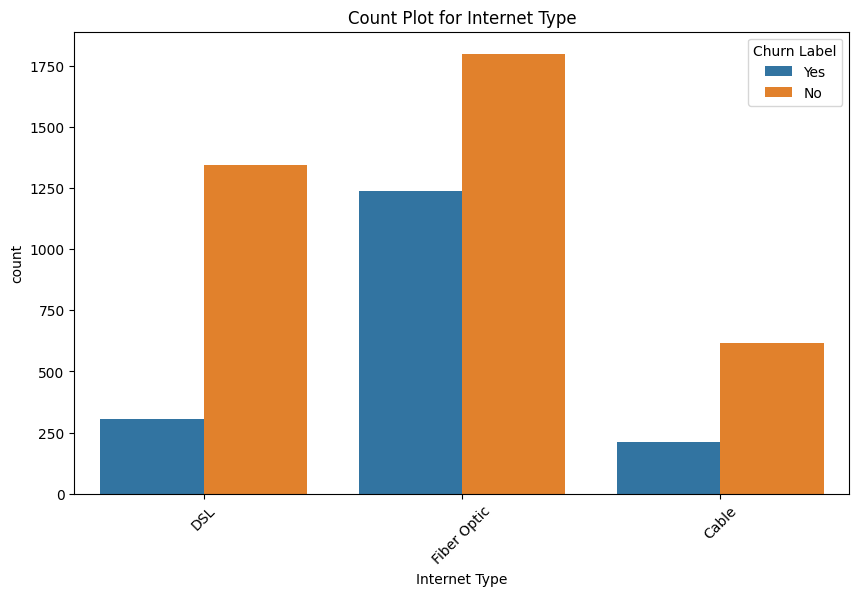

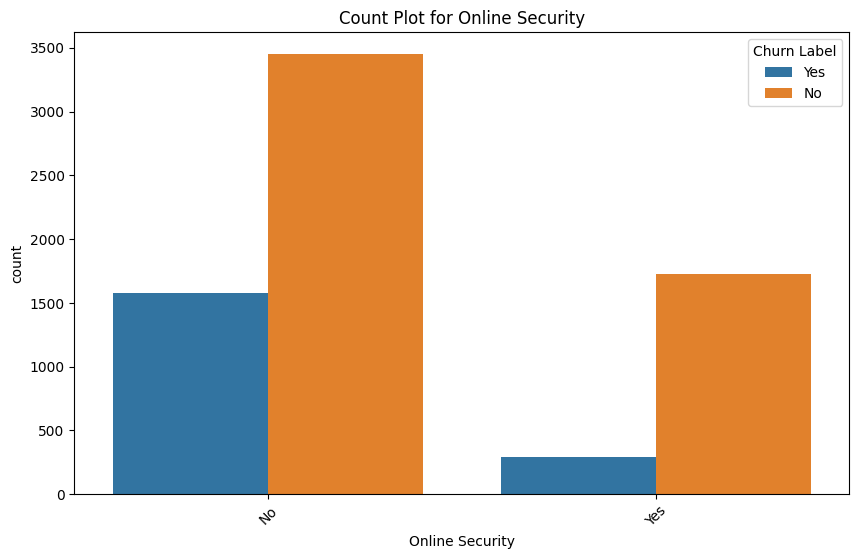

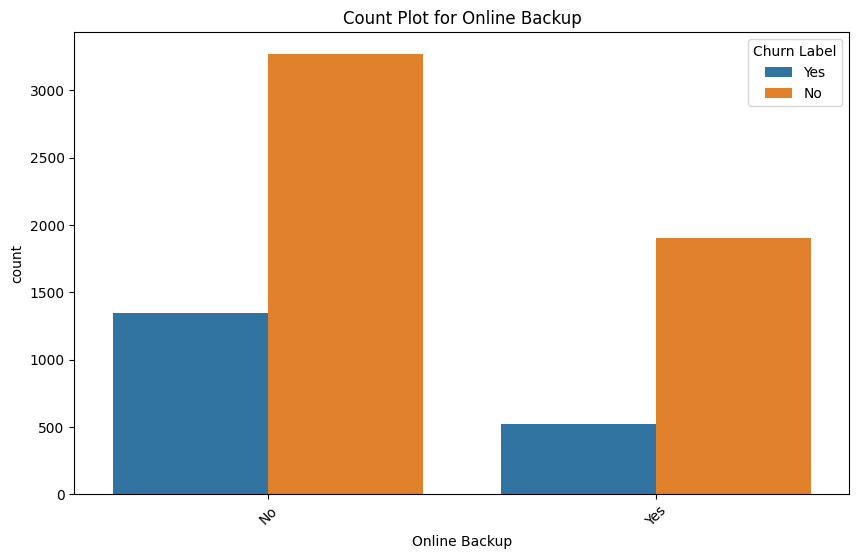

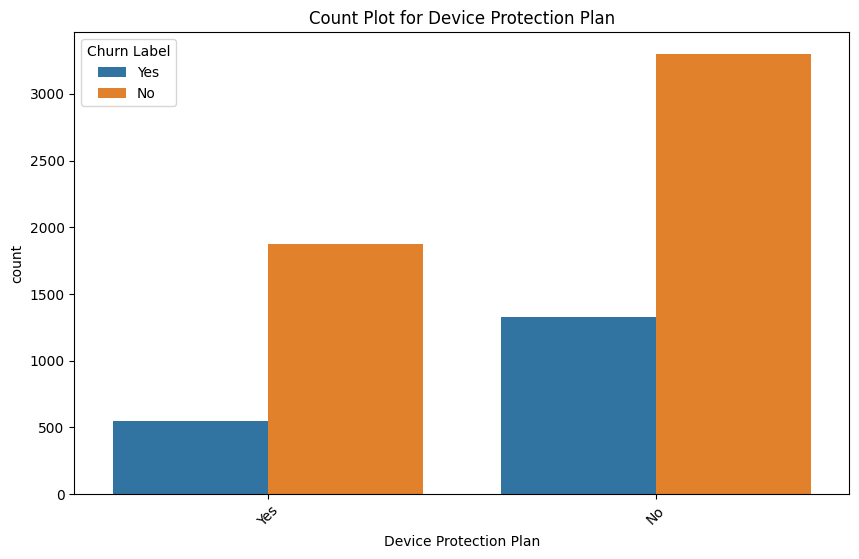

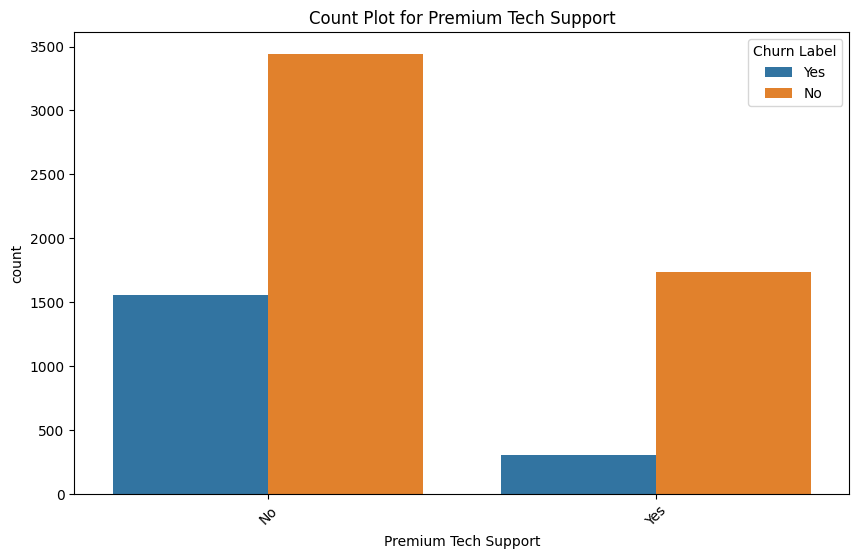

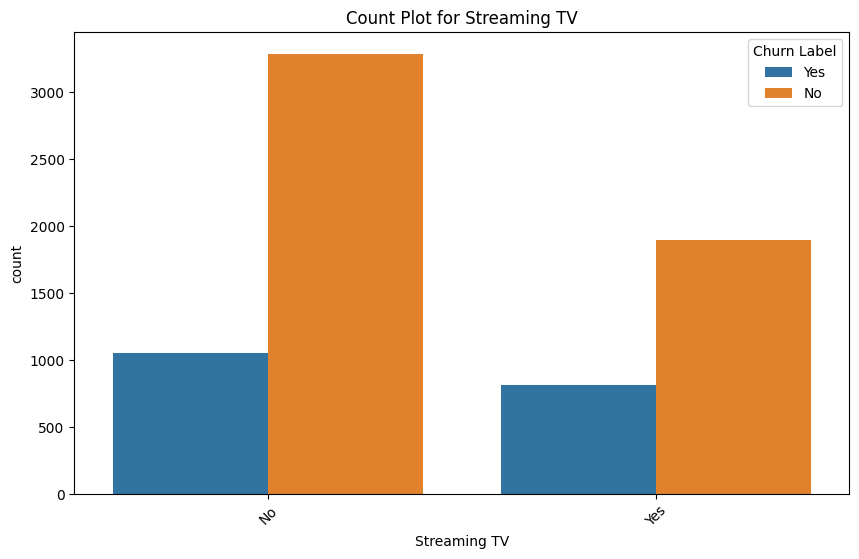

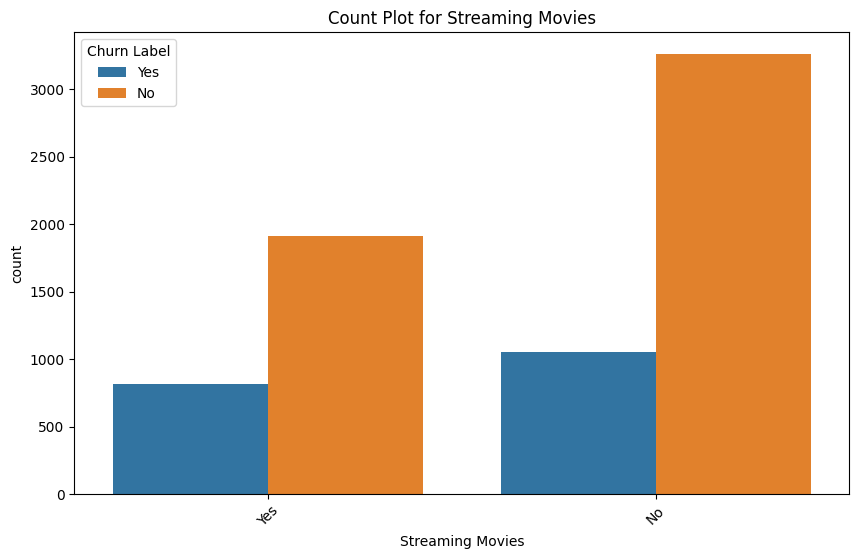

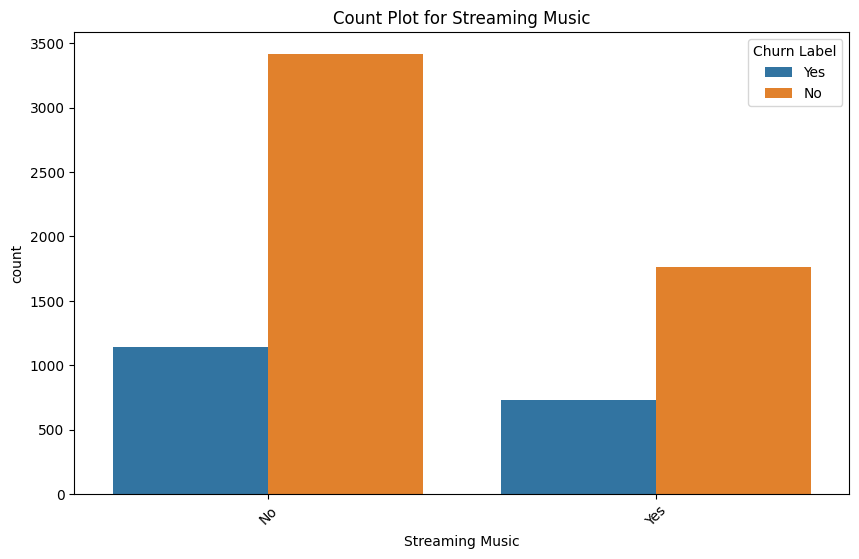

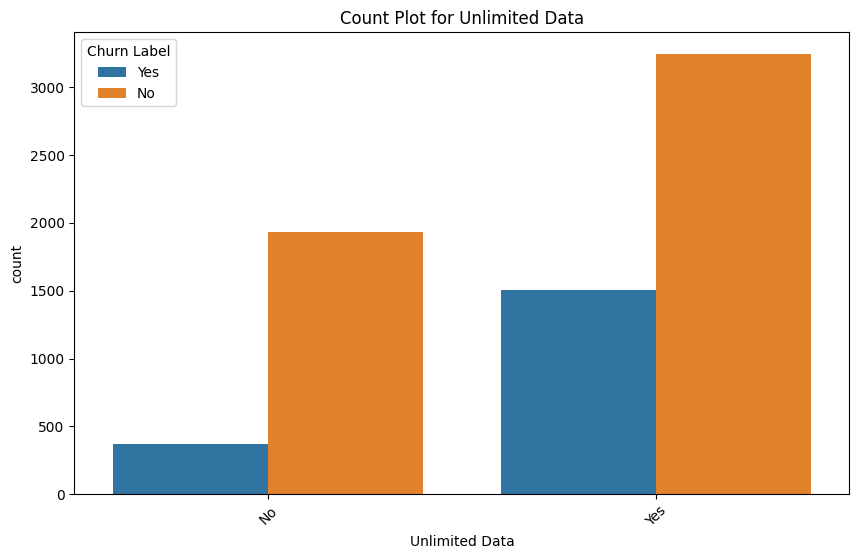

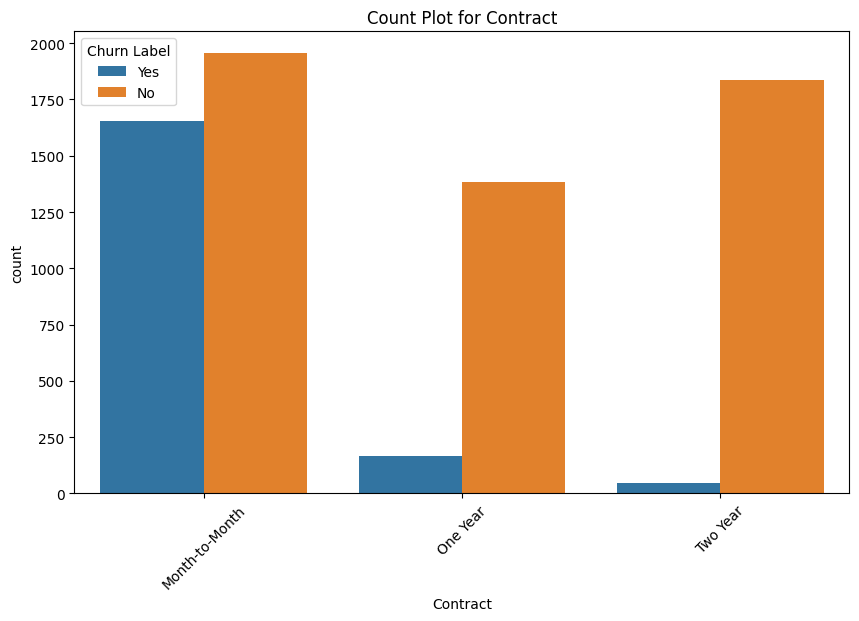

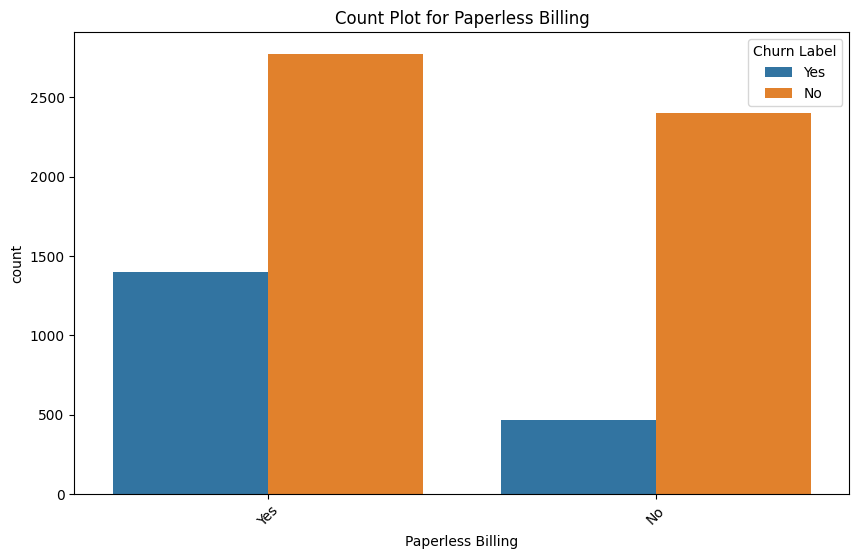

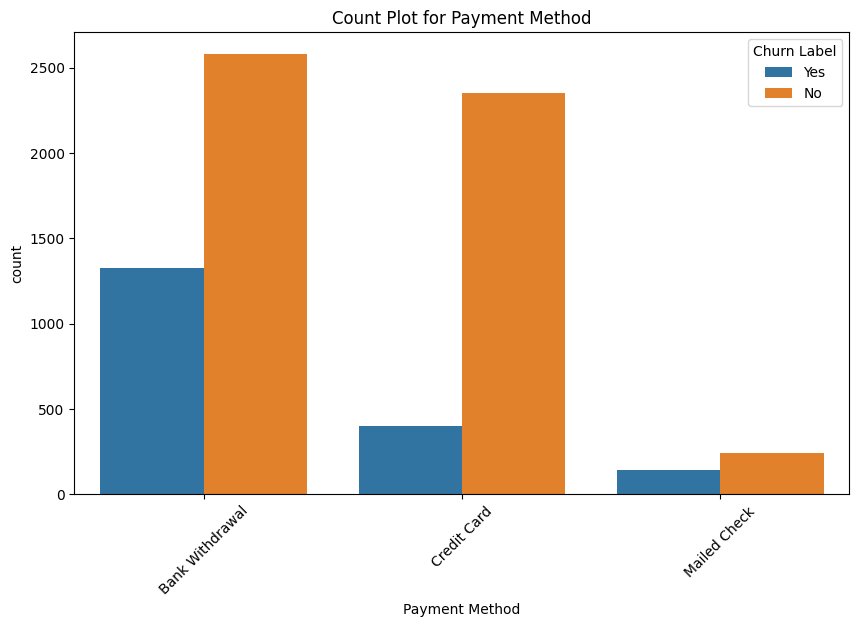

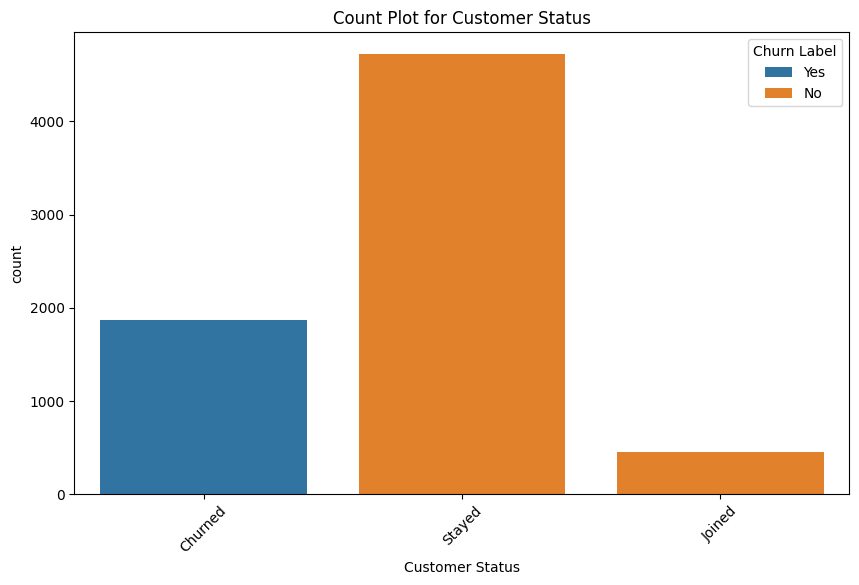

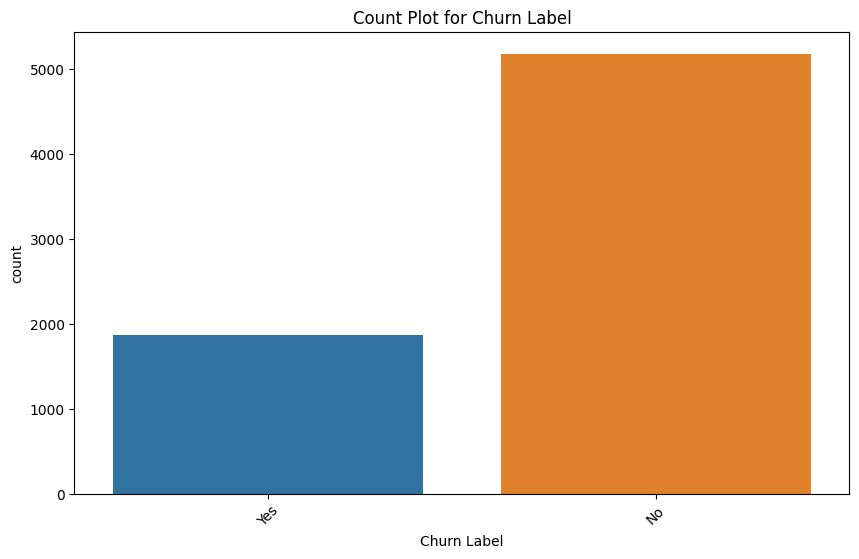

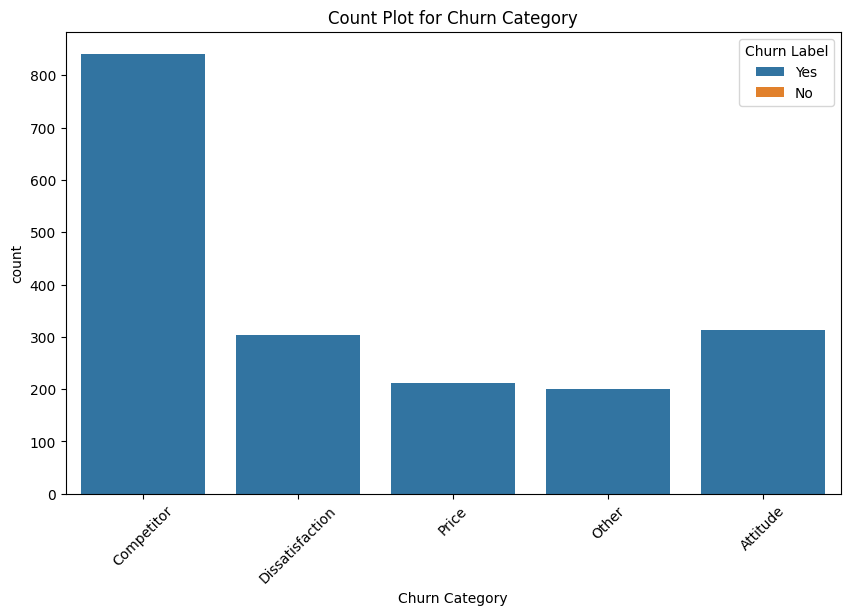

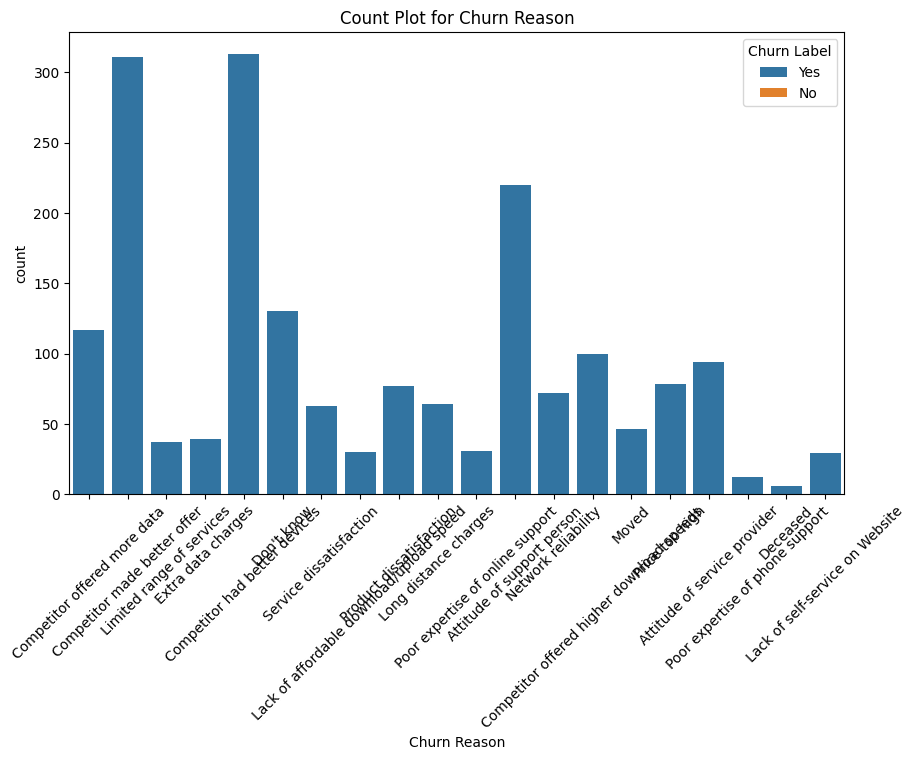

In [10]:
categorical_columns = [
    'Gender',
    'Under 30',
    'Senior Citizen',
    'Married',
    'Referred a Friend',
    'Offer',
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Internet Type',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data',
    'Contract',
    'Paperless Billing',
    'Payment Method',
    'Customer Status',
    'Churn Label',
    'Churn Category',
    'Churn Reason'
]
# Create count plots
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='Churn Label')  # Use Churn Label to differentiate
    plt.title(f'Count Plot for {column}')
    plt.xticks(rotation=45)
    plt.show()


Here I will analyze variables with significant correlations to churn rate:
- Contract: Customers with Month-to-Month contracts have a significantly higher churn rate compared to those with One Year and Two Year contracts.
- Internet Type: The chart reveals that Fiber Optic has the highest churn rate, indicating dissatisfaction possibly due to cost or service quality, while DSL customers have the lowest churn rate, suggesting a more stable and satisfied segment. Cable shows a moderate churn rate with a smaller customer base.

In [13]:
# Convert the specified columns to numeric, coercing errors to NaN
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')


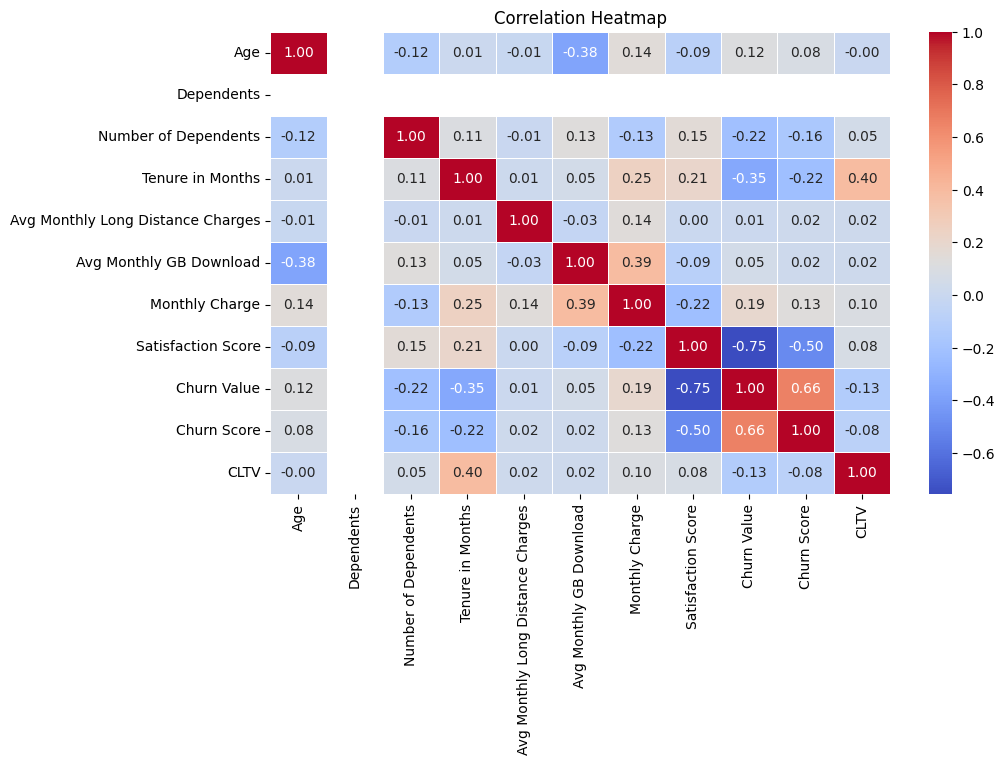

In [14]:
# Create a heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


Here we can see that not many variables have significant correlations with each other but a few:

- Satisfaction Score and Churn Value (Strong Negative Correlation: -0.75): Customers with higher satisfaction scores are much less likely to churn.
Action: Focus on improving satisfaction to reduce churn effectively.

- Churn Score and Churn Value (Strong Positive Correlation: 0.66): Churn score is a reliable predictor of actual churn behavior.
Action: Use churn score to identify and target at-risk customers.

- Tenure in Months and Churn Value (Moderate Negative Correlation: -0.35):
Newer customers are more likely to churn.
Action: Prioritize retention strategies for customers with shorter tenure, such as better onboarding and incentives.



# Building Logistic Regression Model

In [124]:
# I choose variables that have most correlation to the decision to churn, based on EDA phase
X = df[['Contract', 'Internet Type', 'Satisfaction Score', 'Tenure in Months', 'Churn Score']].values
y = df['Churn Value'].values


## Encoding categorical data

In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
y = np.array(y)

## Splitting the dataset into training set and test set

In [126]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feature Scaling

In [127]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train[:,6:] = SC.fit_transform(X_train[:,6:])
X_test[:,6:] = SC.transform(X_test[:,6:])


## Training the Logistic Regression Model

In [128]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(random_state= 0)
Classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

## Prediction

In [129]:
y_pred = Classifier.predict(X_test)

# Model performance evaluation

### Accuracy Score and Confusion Matrix

In [130]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[986  23]
 [ 28 372]]


0.9638041163946061

These indicators show that for non-churn (class 0), my model made 986 correct predictions and 23 incorrect predictions. For churned customers, it correctly predicted 372 observations, with 28 false predictions. The accuracy score, calculated by dividing the number of correct predictions by the total number of predictions, indicates that my model achieved an accuracy of 96.4%.

### Classification report

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1009
           1       0.94      0.93      0.94       400

    accuracy                           0.96      1409
   macro avg       0.96      0.95      0.96      1409
weighted avg       0.96      0.96      0.96      1409



The precision, recall, and F1-score are all above 90%, indicating that the model demonstrates high accuracy.










### K fold cross validation

In [132]:
accuracies = cross_val_score(estimator=Classifier, X = X_train, y=y_train, cv =10 )
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.14 %
Standard Deviation: 0.74 %


To further ensure the accuracy of this model, I also used K fold cross validation with k = 10 (seperate the dataset into 10 equal parts and run it).
- The standard deviation of 0.74% reflects minimal variability across the folds, highlighting the model's stability and consistency.
- An accuracy of 97.14% indicates excellent predictive performance, suggesting the model effectively classifies most observations.